### Import Libraries

Essential libraries for data manipulation, visualization, and building machine learning models:
- **os**: Interact with the operating system.
- **random**: Generate random numbers.
- **numpy**: Numerical operations on arrays.
- **pandas**: Data manipulation and analysis.
- **tqdm**: Progress bar for loops.
- **matplotlib.pyplot**: Plotting graphs and images.
- **cv2 (OpenCV)**: Image processing.
- **tensorflow**: Deep learning framework.
- **%matplotlib inline**: Display plots inline in Jupyter notebooks.

In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
from random import random
import tensorflow as tf
%matplotlib inline


### Cropping Image to Capture Face Only

Detects and crops the largest face in an image:
- **Face Detection:** Uses `cv2.CascadeClassifier` with the Haar Cascade classifier.
- **Image Processing:** Converts image to grayscale for face detection.
- **Face Detection:** Identifies faces using `detectMultiScale`.
- **Largest Face:** Selects the largest face if multiple faces are detected.
- **Visualization:** Randomly plots a small percentage (~0.3%) of original and cropped images for verification.

In [2]:
# Cropping image to capture face only
def cropImg(imgPath):
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    img = cv2.imread(imgPath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detecting faces in image
    faces = faceCascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
    
    # Returning the original image if no face is detected
    if len(faces) == 0:
        return img
    
    # Finding largest face from image (if multiple are detected)
    x, y, w, h = max(faces, key = lambda x : x[2] * x[3])
    croppedImg = img[y:y + h, x:x + w]
    
    # Plotting about 0.3% random original and cropped images
    if random() < 0.003:
        plt.figure(figsize = (6, 3))
        
        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # Cropped image
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(croppedImg, cv2.COLOR_BGR2RGB))
        plt.title('Cropped Image')
        plt.axis('off')
        
        plt.show()
        
    return croppedImg

### Cropping and Saving Faces

Processes images from a dataset, cropping faces, and saving the results:
- **Paths:** 
  - `path`: Directory containing the original dataset.
  - `croppedPath`: Directory to save cropped images.
- **Folders:** 
  - Creates directories for cropped images, maintaining category structure.
- **Image Processing:** 
  - Iterates through images, crops faces, and saves the results.

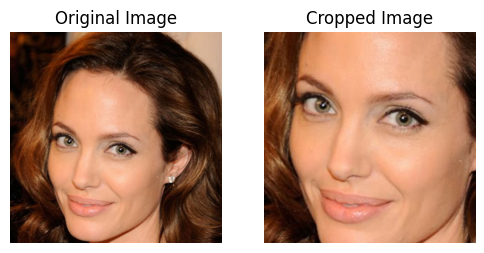

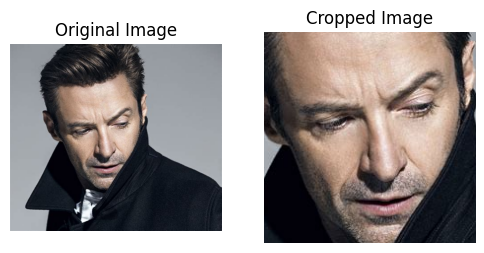

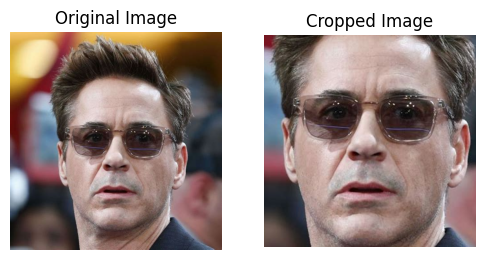

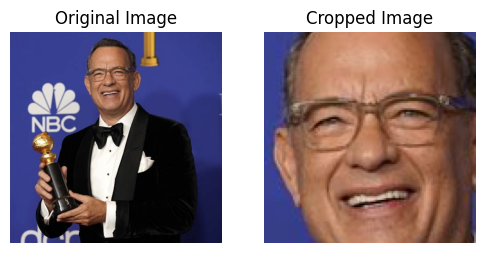

In [3]:
path = r'C:\Users\Mimja\OneDrive\Desktop\Transfer_Learning\Celebrity Faces Dataset'


croppedPath = r'C:\Users\Mimja\OneDrive\Desktop\Transfer_Learning\Cropped Faces'
os.makedirs(croppedPath, exist_ok = True)

for folder in os.listdir(path):
    folderPath = os.path.join(path, folder)
    
    # Making folder for each category in the cropped dataset
    croppedFolderPath = os.path.join(croppedPath, folder)
    os.makedirs(croppedFolderPath, exist_ok=True)
    
    for img in os.listdir(folderPath):
        imgPath = os.path.join(folderPath, img)
        croppedFace = cropImg(imgPath)
        
        if croppedFace is not None:
            croppedImgPath = os.path.join(croppedFolderPath, img)
            cv2.imwrite(croppedImgPath, croppedFace)

### List Class Names

Lists the class names from the dataset directory and prints the number of classes:
- **Path:** Directory containing the dataset
- **Class Names:** Extracted from folder names in the dataset directory

In [4]:
import os

dataset_path = r"C:\Users\Mimja\OneDrive\Desktop\Transfer_Learning\Celebrity Faces Dataset"
class_names = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

print(class_names)
print(len(class_names))


['Angelina Jolie', 'Brad Pitt', 'Denzel Washington', 'Hugh Jackman', 'Johnny Depp', 'Leonardo DiCaprio', 'Robert Downey Jr', 'Tom Cruise', 'Tom Hanks', 'Will Smith']
10


### Displaying Sample Images from Each Class

Visualizes one sample image from each class in the dataset:
- **Figure Size:** Sets the figure size to `(15, 4)`
- **Loop:** Iterates through each class folder, reads one image, and plots it
- **Image Processing:**
  - Uses `cv2.imread` to read images
  - Converts BGR to RGB for proper color display
- **Subplots:**
  - Displays each image in a subplot grid
  - Labels each subplot with the class name
  - Hides x and y ticks for cleaner display

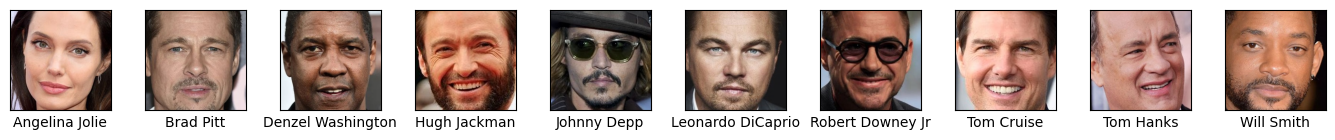

In [5]:

plt.figure(figsize=(15,4))
i=0
for c in class_names:  
    path = os.path.join(croppedPath,c)
    try:
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            plt.subplot(3,11,i+1)
            plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
            plt.xlabel(c)
            plt.xticks([])
            plt.yticks([])
            i += 1
            break
    except Exception as e:
        pass
plt.tight_layout()        
plt.show() 

### Preparing Dataset

Splits the dataset into training, validation, and test sets:
- **Initialize Lists:** `train_data`, `test_data`, `valid_data`
- **Split Ratio:** 80% training, 20% validation/test
- **Loop through Classes:** 
  - Shuffles and splits images into training, validation, and test sets
  - **Image Processing:** Reads, converts color, resizes, and appends images to the respective lists
- **Progress Display:** Uses `tqdm` for progress bars

In [6]:
import random

train_data = []
test_data = []
valid_data = []

split_ratio = 0.8

for c in class_names:  
    path = os.path.join(croppedPath, c)
    imgs = os.listdir(path) 
    random.shuffle(imgs)

    total_sample_num = len(imgs)
    train_sample_num = int(total_sample_num * split_ratio * 0.8)
    valid_sample_num = int(total_sample_num * split_ratio * 0.2)

    train_imgs = imgs[ : train_sample_num]
    valid_imgs = imgs[train_sample_num : train_sample_num + valid_sample_num]
    test_imgs =  imgs[train_sample_num + valid_sample_num : ]

    for img in tqdm(train_imgs, desc=f"Train data: {c}"):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_array, (256, 256))  
            train_data.append([img_resized, class_names.index(c)]) 
        except Exception as e:
            pass
    
    for img in tqdm(valid_imgs, desc=f"Valid data: {c}"):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_array, (256, 256))  
            valid_data.append([img_resized, class_names.index(c)])
        except Exception as e:
            pass
    
    for img in tqdm(test_imgs, desc=f"Test data: {c}"):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_array, (256, 256))  
            test_data.append([img_resized, class_names.index(c)]) 
        except Exception as e:
            pass


Test data: Will Smith: 100%|██████████| 20/20 [00:00<00:00, 91.70it/s]


### Preparing Data for Model Training

Shuffles the data, extracts features and labels, converts to numpy arrays, and reshapes:
- **IMG_SIZE:** 256
- **Shuffle:** Randomly shuffles training, validation, and test data.
- **Extract Features and Labels:** Splits data into features (X) and labels (Y).
- **Convert to Numpy Arrays:** Converts features and labels to numpy arrays and reshapes them.
- **Print Sample Counts:** Displays the number of samples in each set.

In [7]:
# Shuffle the data
IMG_SIZE = 256
from random import shuffle

shuffle(train_data)
shuffle(valid_data)
shuffle(test_data)

# Extract features (X) and labels (Y)
X_train, y_train = zip(*train_data)
X_valid, y_valid = zip(*valid_data)
X_test, y_test = zip(*test_data)

# Convert to numpy arrays and reshape
X_train = np.array(X_train).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)
X_valid = np.array(X_valid).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_valid = np.array(y_valid)
X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)

# Print the number of samples in each set
print("Number of training samples:", len(train_data))
print("Number of validation samples:", len(valid_data))
print("Number of test samples:", len(test_data))

Number of training samples: 640
Number of validation samples: 160
Number of test samples: 200


### Save Data Using Pickle

Saves the processed data and categories to pickle files for later use:
- **Pickle Files:** Categories, training, validation, and test sets for features 

In [8]:
import pickle
save_dir = r'C:\Users\Mimja\OneDrive\Desktop\Transfer_Learning'

pickle_out = open(os.path.join(save_dir, "categories.pickle"),"wb")
pickle.dump(class_names, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "X_train.pickle"),"wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "y_train.pickle"),"wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "X_valid.pickle"),"wb")
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "y_valid.pickle"),"wb")
pickle.dump(y_valid, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "X_test.pickle"),"wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(save_dir, "y_test.pickle"),"wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()